# Preditcting The spending of Customers Using Machine Learning

The goal of this project is to predict the spending behaviour of a customer in an Airline based on their flight frequency, loyalty program tier, total distance travelled, average time interval between flights and point redemption activity using a Linear Regression Model. The dataset(flight.csv) used for this project contains the data about the customers and their activities with the airline. The data will be preprocessed to handle inconsistencies and prepare it for modeling, after which a Linear Regression model will be trained and its performance will be evaluated using appropriate metrics.

# Task 1: Description of the Dataset

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Loading the dataset
Data_Frame = pd.read_csv('C:/D drive content/DJ InIT. AI Research/Task-2/Dataset/flight.csv')

In [3]:
# Displaying the first few rows of the DataFrame
Data_Frame.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11-02-2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,08-03-2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,02-01-2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,04-10-2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [4]:
# Shape of the DataFrame
print("Number of rows in the DataFrame:- ",Data_Frame.shape[0])
print("Number of columns in the DataFrame:- ",Data_Frame.shape[1])

Number of rows in the DataFrame:-  62988
Number of columns in the DataFrame:-  23


In [5]:
# Information about the columns and data types
Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [6]:
# Statistical summary of the DataFrame
Data_Frame.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


This was an overview of the entire dataset we are using. Now let's clean the data and prepare it for modeling.
The columns we will be using for modeling are:
Target (Y): SUM_YR_2 -> Customer’s spending in the second year. 
Features (X):FLIGHT_COUNT -> Travel frequency,
             SEG_KM_SUM -> Total distance travelled,
             AVG_INTERVAL -> Average gap between flights,
             EXCHANGE_COUNT -> Reward point redemptions,
             FFP_TIER -> Loyalty program level

# Task 2: Data Preprocessing

In [7]:
# 1. Checking for Missing Values
print("Total missing values in each column:")
print(Data_Frame.isnull().sum())
print("Percentage of missing values in each column:")
print(Data_Frame.isnull().sum()/len(Data_Frame)*100)


Total missing values in each column:
MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64
Percentage of missing values in each column:
MEMBER_NO            0.000000
FFP_DATE             0.000000
FIRST_FLIGHT_DATE    0.000000
GENDER               0.004763
FFP_TIER             0.000000
WORK_CITY            3.602273
WORK_PROVINCE        5.156538
WORK_COUNTRY         0.041278
AGE                  0.666794
LOAD_TIME            0.000000
FLIGHT_

In [8]:
# Handling Missing values for the necessary columns
for col in Data_Frame.columns:
    if Data_Frame[col].dtype in ['int64', 'float64']:
        Data_Frame[col] = Data_Frame[col].fillna(Data_Frame[col].median())
    else:
        Data_Frame[col] = Data_Frame[col].fillna('Unknown')

# verifying that there are no missing values left
print("Missing values after handling:")
print(Data_Frame.isnull().sum())

Missing values after handling:
MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64


In [9]:
# Checking for duplicate values
Data_Frame.duplicated().value_counts()

False    62988
Name: count, dtype: int64

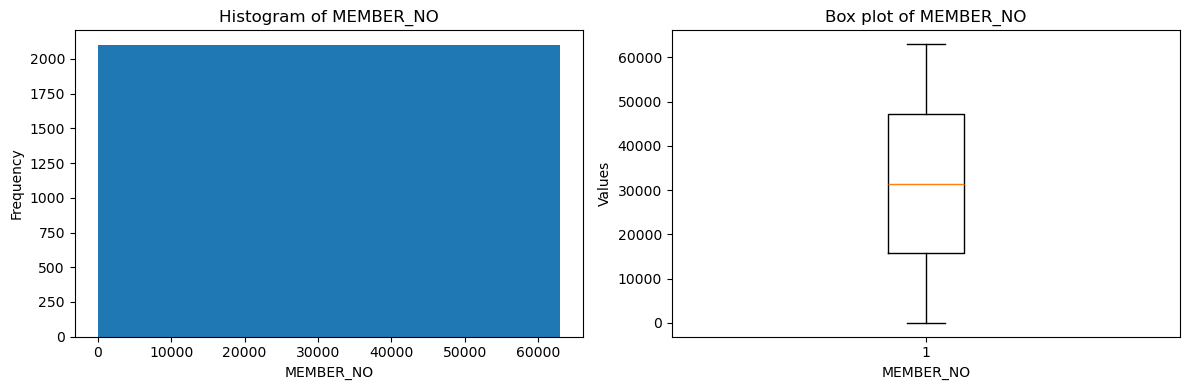

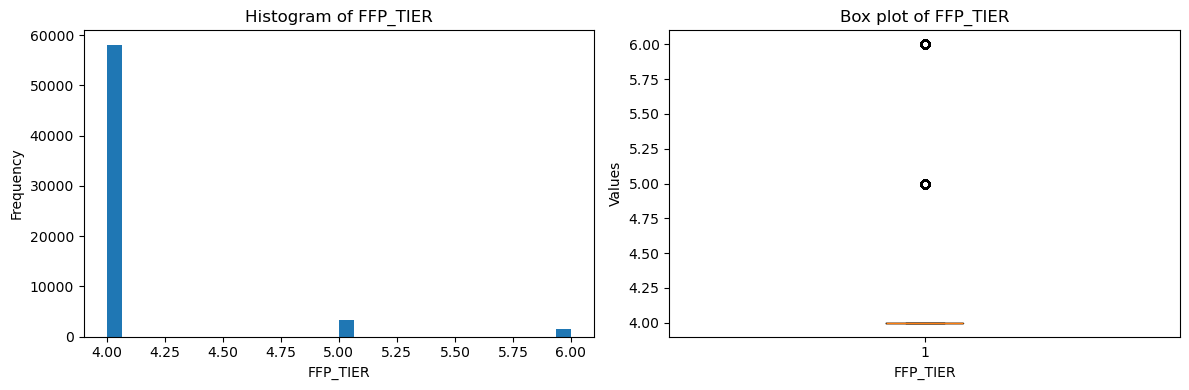

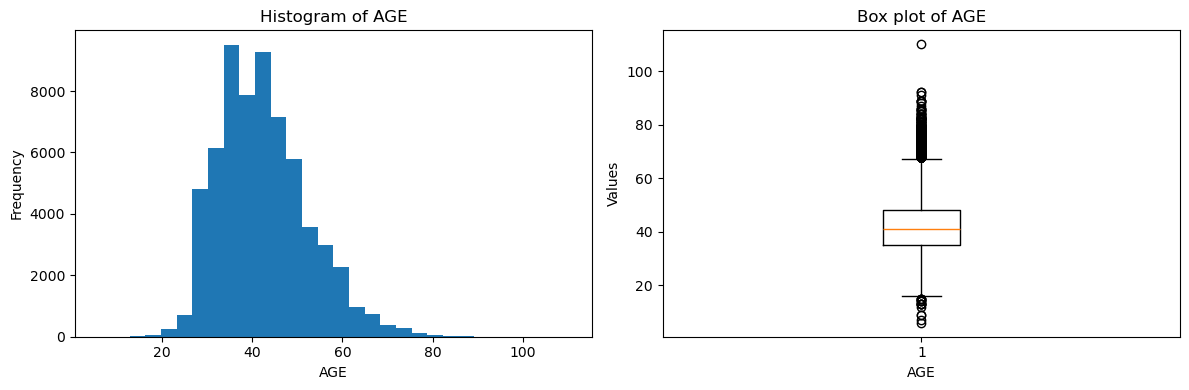

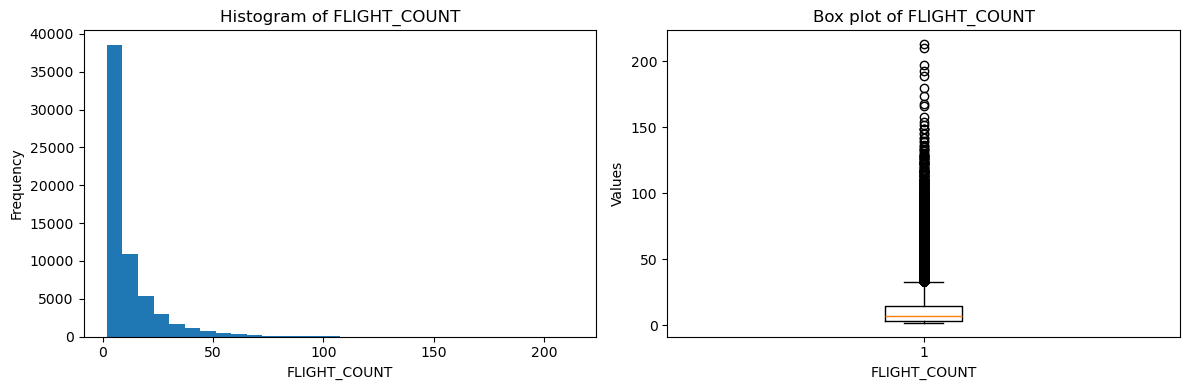

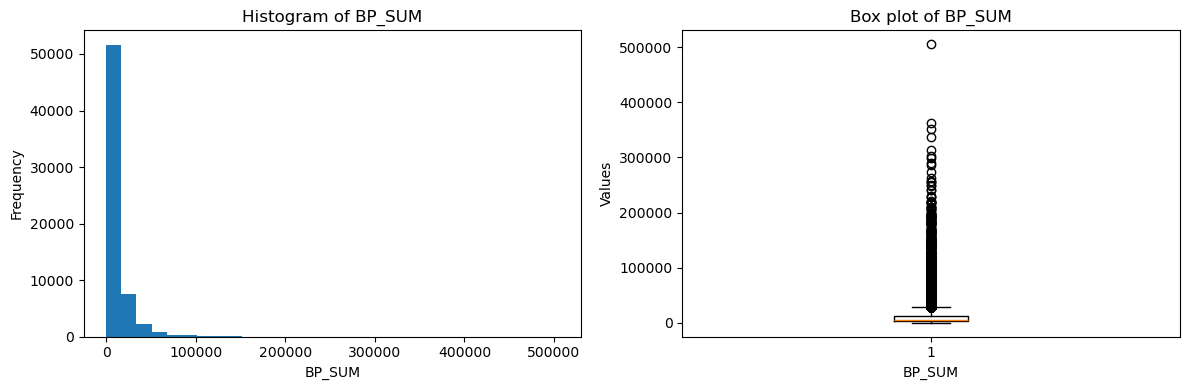

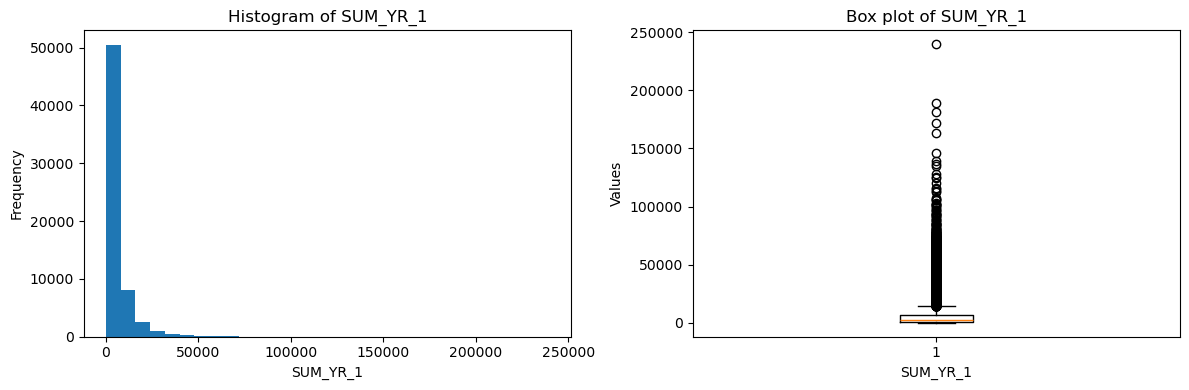

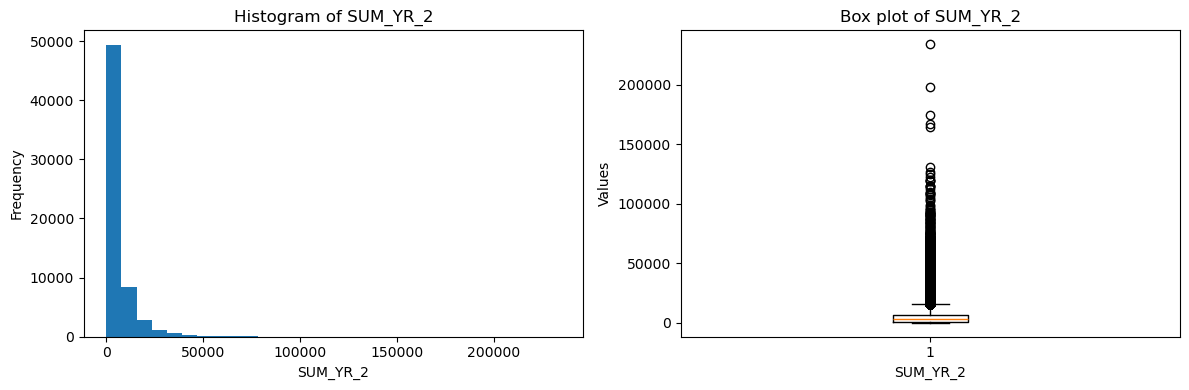

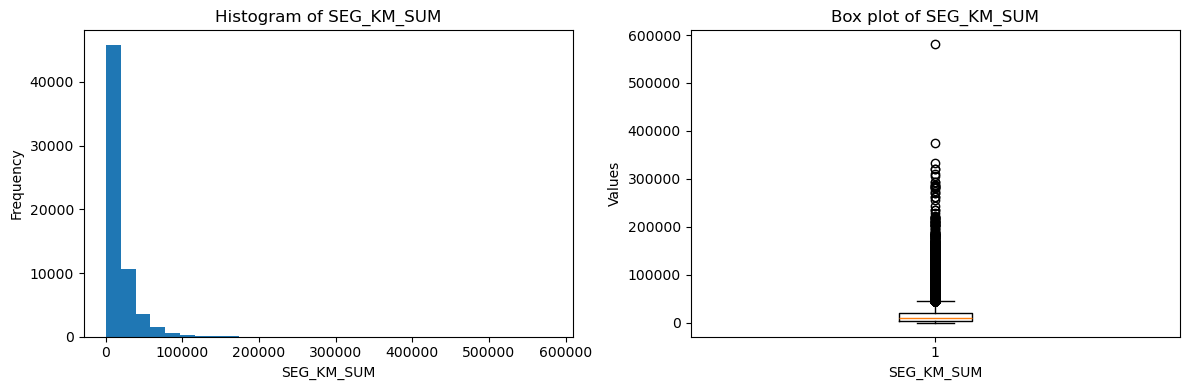

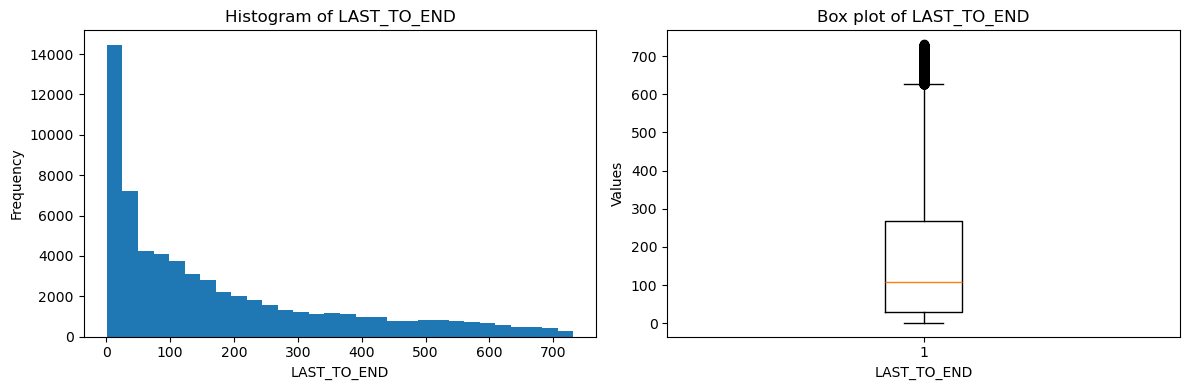

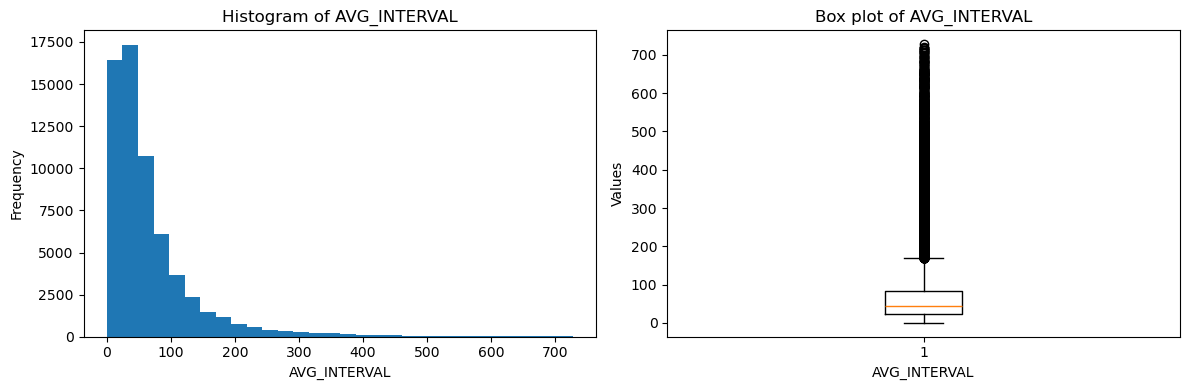

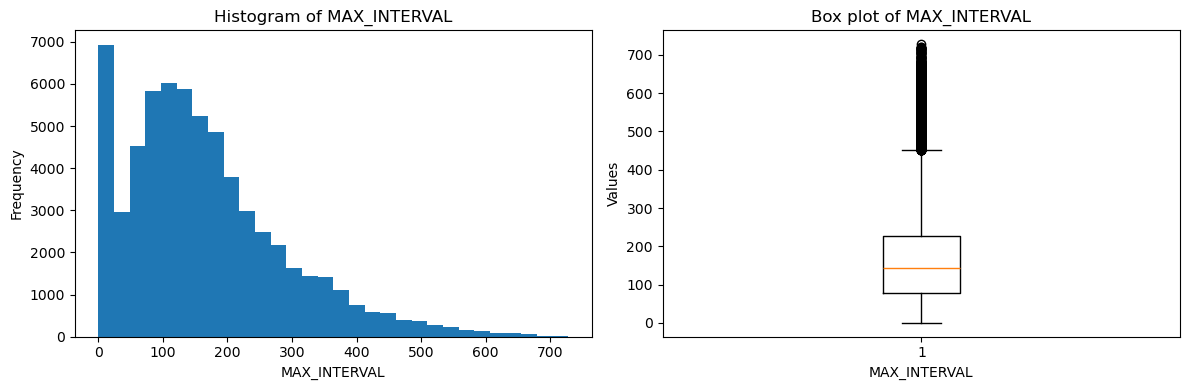

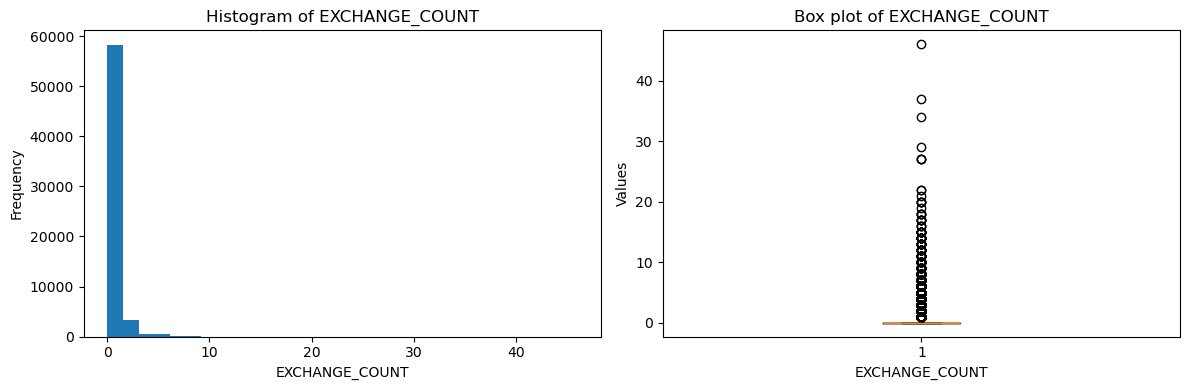

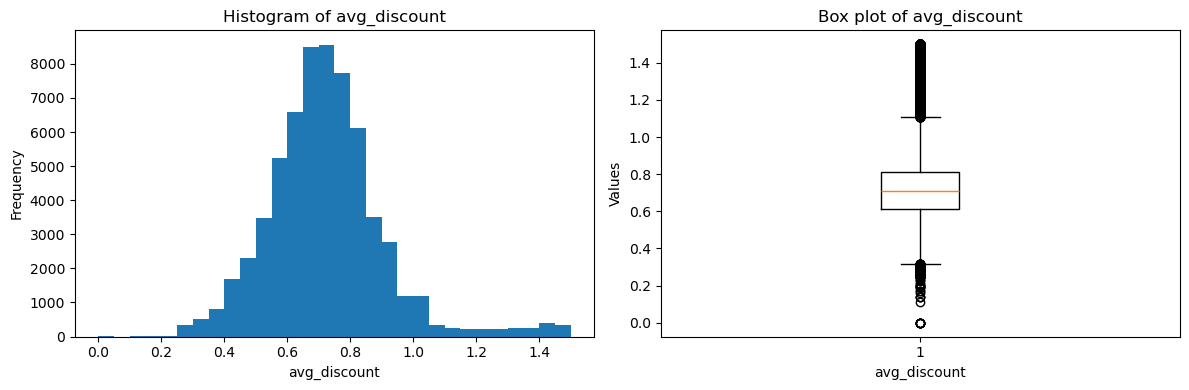

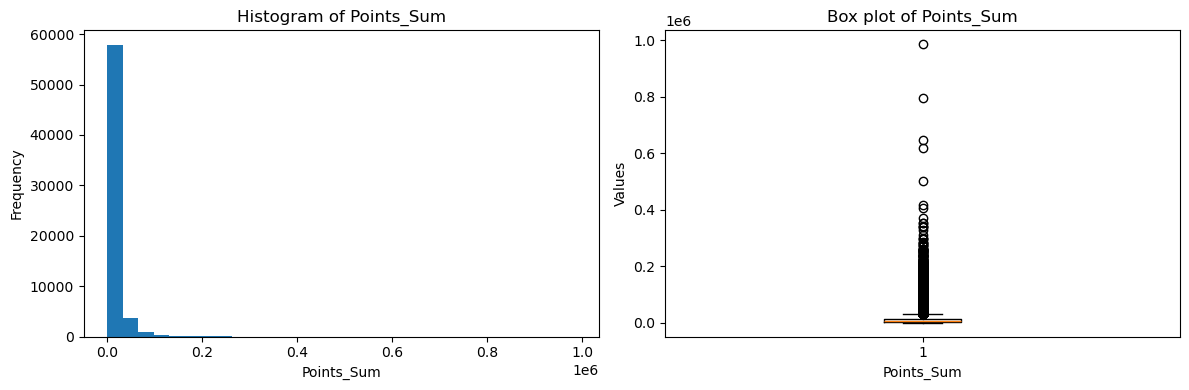

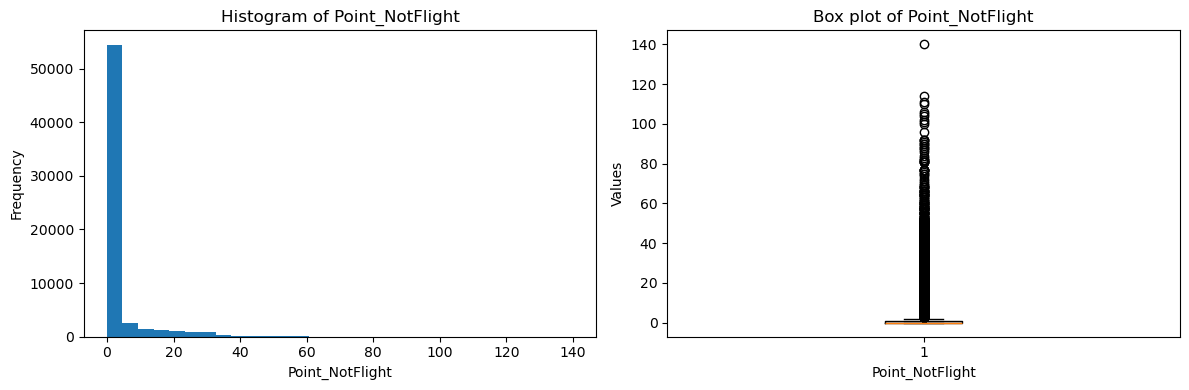

In [10]:
# checking distribution and outliers in numerical columns
for col in Data_Frame:
    if Data_Frame[col].dtype in ['int64', 'float64']:
        plt.figure(figsize=(12, 4))

        # Histogram (left plot)
        plt.subplot(1, 2, 1)
        plt.hist(Data_Frame[col].dropna(), bins=30)
        plt.title("Histogram of " + col)
        plt.xlabel(col)
        plt.ylabel("Frequency")

        # Boxplot (right plot)
        plt.subplot(1, 2, 2)
        plt.boxplot(Data_Frame[col].dropna())
        plt.title("Box plot of " + col)
        plt.xlabel(col)
        plt.ylabel("Values")

        plt.tight_layout()
        plt.show()


the box plot and histogram tells us about the distribution of all the int64 and float64 columns in the dataset. We can see that there are some outliers in the data which we will handle during the data preprocessing step. We will use the IQR method to handle the outliers in the data.

In [11]:
# Handling Outliers using IQR method
for col in Data_Frame:
    if Data_Frame[col].dtype in ['int64', 'float64']:
        Q1 = Data_Frame[col].quantile(0.25)
        Q3 = Data_Frame[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        Data_Frame = Data_Frame[(Data_Frame[col] >= lower_bound) & (Data_Frame[col] <= upper_bound)]

        # For verifying that the outliers have been removed, run the above cell again to see the box plots without outliers.

also we need to to scale the features so that they are on the same scale. We will use StandardScaler from sklearn to scale the features.


In [12]:
# scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()               # creating an instance of StandardScaler
numerical_cols = Data_Frame.select_dtypes(include=['int64', 'float64']).columns
Data_Frame[numerical_cols] = scaler.fit_transform(Data_Frame[numerical_cols])           # the fit_transform method is used to fit the scaler to the data and then transform it.


now all the features are scaled and ready for modeling. We will now split the data into training and testing sets and train a Linear Regression model on the training set.

# Taks 3: Implementing Linear Regression Model

In [13]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X = Data_Frame[["FLIGHT_COUNT", "SEG_KM_SUM", "AVG_INTERVAL", "EXCHANGE_COUNT", "FFP_TIER"]]    # Features
y = Data_Frame["SUM_YR_2"]                                                                      # Target variable           
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)       # Splitting the data into training and testing sets with 80-20 ratio
# In the above splitting code the test_size parameter is for the amount of data  for testing and random_state is for keeping the split data same everytime we run the code.
# Displaying the shapes of the training and testing sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(24826, 5)
(6207, 5)
(24826,)
(6207,)


Now all we can begin with implementing the Linear Regression model

In [14]:
# implementing the Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()                      # creating an instance of LinearRegression
model.fit(X_train, y_train)                     # fitting the model to the training data

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse) 
print("R-squared (R2 ):", r2)
# The MAE and MSE values should be as low as possible and R2 value should be as close to 1 as possible for a good model.


Mean Absolute Error (MAE): 0.5824160091749685
Mean Squared Error (MSE): 0.5476903709563494
R-squared (R2 ): 0.44924198394597903


Conclusion: The Linear Regression model was able to predict the spending behaviour of customers with a moderate(baseline) accuracy. The R-squared value indicates that a significant portion of the variance in customer spending can be explained by the features used in the model. Further improvements can be made by exploring additional features, and experimenting with more complex models. Overall, this project demonstrates the potential of machine learning in predicting customer behaviour in the airline industry.

# Task 4: Implementing K-means Clustering

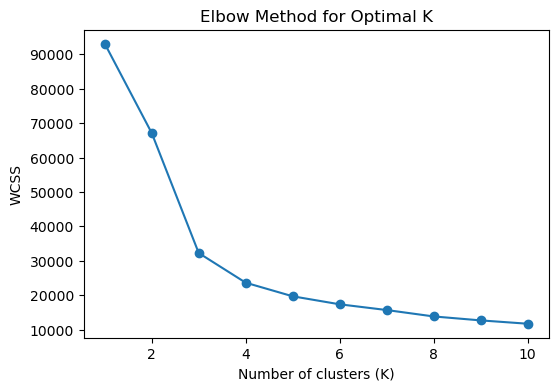

In [ ]:
# Implementing K-means Clustering to find optimal number of clusters using Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X_cluster = Data_Frame[["FLIGHT_COUNT", "SEG_KM_SUM", "AVG_INTERVAL", "EXCHANGE_COUNT", "FFP_TIER"]]
wcss = []       # within-cluster sum of squares means the sum of squared distances between each point and the centroid of its cluster.
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)  # creating an instance of KMeans with k clusters
    kmeans.fit(X_cluster)                     # fitting the model to the data
    wcss.append(kmeans.inertia_)          # inertia_ attribute gives the WCSS value for the fitted model
# Plotting the Elbow Method graph
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


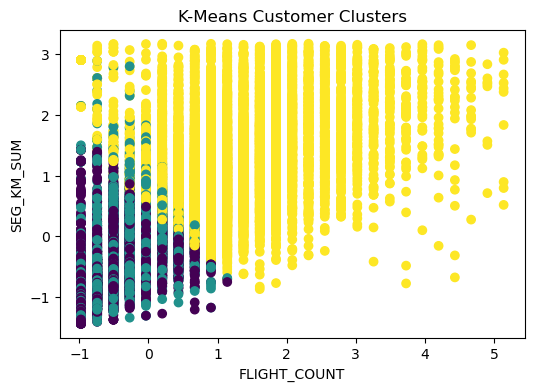

In [17]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_cluster)

plt.figure(figsize=(6,4))
plt.scatter(
    X_cluster.iloc[:, 0],
    X_cluster.iloc[:, 1],
    c=clusters
)
plt.xlabel("FLIGHT_COUNT")
plt.ylabel("SEG_KM_SUM")
plt.title("K-Means Customer Clusters")
plt.show()


Data_Frame["Cluster"] = clusters
